# パッケージインストール

In [1]:
!pip install -q git+https://github.com/huggingface/transformers accelerate
!pip install -q qwen-vl-utils[decord]==0.0.8

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 52.9 MB/s 

# サンプル画像ダウンロード

In [2]:
!wget https://user0514.cdnw.net/shared/img/thumb/ikebukuroDMW07186_TP_V4.jpg -O sample.jpg

--2025-03-01 09:37:32--  https://user0514.cdnw.net/shared/img/thumb/ikebukuroDMW07186_TP_V4.jpg
Resolving user0514.cdnw.net (user0514.cdnw.net)... 172.237.5.221
Connecting to user0514.cdnw.net (user0514.cdnw.net)|172.237.5.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77331 (76K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  75.52K  --.-KB/s    in 0.1s    

2025-03-01 09:37:33 (599 KB/s) - ‘sample.jpg’ saved [77331/77331]



# モデル読み込み

In [3]:
# モデル選択
model_path = "Qwen/Qwen2.5-VL-3B-Instruct"  # T4 GPU
# model_path = "Qwen/Qwen2.5-VL-7B-Instruct"  # T4 GPU
# model_path = "Qwen/Qwen2.5-VL-72B-Instruct"  # 動作不可（A100 GPU）

In [4]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor

model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    model_path,
    torch_dtype="auto",
    device_map="auto"
)
processor = AutoProcessor.from_pretrained(model_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

# プロンプト生成

In [5]:
from qwen_vl_utils import process_vision_info

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "sample.jpg"},
            {"type": "text", "text": "画像を説明してください"},
        ],
    }
]
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# 推論

In [6]:
%%time

generated_ids = model.generate(**inputs, max_new_tokens=256)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

CPU times: user 9.31 s, sys: 652 ms, total: 9.97 s
Wall time: 10.6 s


# 結果確認

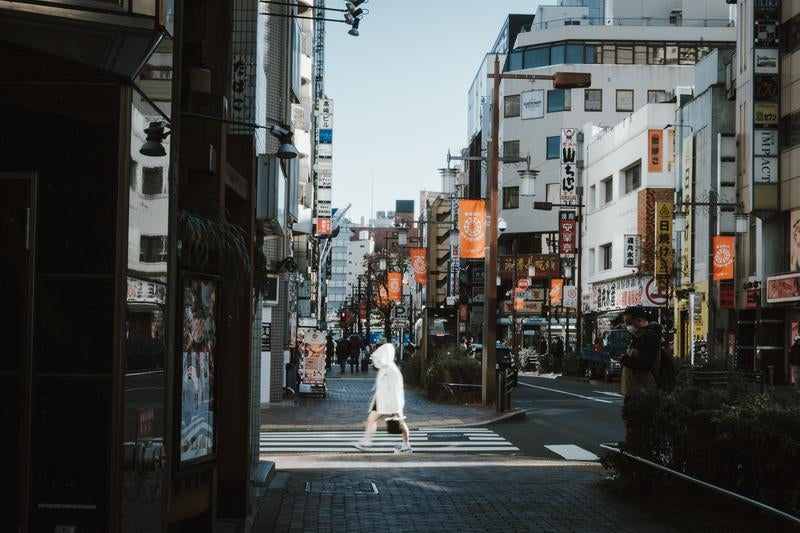

In [7]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('sample.jpg')
cv2_imshow(image)

In [8]:
import textwrap

print(textwrap.fill(output_text[0], width=50))

この画像は、日本の都市部の風景を捉えています。画面には、歩道や商店街が見え、多くの人々が歩いている様
子が描かれています。背景には高層ビルや建物があり、その中には広告や看板が掲げられています。照明は薄暗
く、おそらく夕方か夜頃の時間帯であることが伺えます。全体的に、都会的な雰囲気と活気がある場所であるこ
とが伝わってきます。
